In [1]:
import tensorflow.keras as keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt


def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()
        

dataset = keras.datasets.mnist.load_data()
    

    
print("There are",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][0]),"images in test dataset")
print("___________________\n\n")

There are 60000 images in training dataset
There are 10000 images in test dataset
___________________




In [2]:
(train_data, train_labels), (test_data, test_labels) = dataset

print("Training data shape: ", train_data.shape) 
print("Training labels shape: ", train_labels.shape) 
print("Test data shape: ", test_data.shape) 
print("Test labels shape: ", test_labels.shape) 

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


Randomly printing 10 images with labels from training dataset
index: 55404
Lable: 2


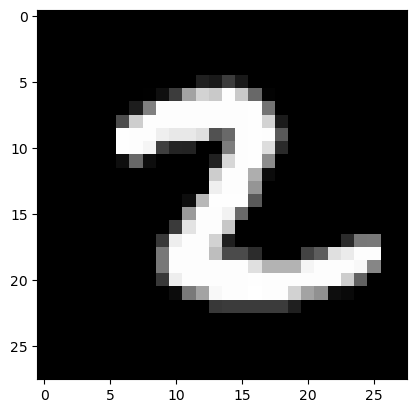

index: 44018
Lable: 5


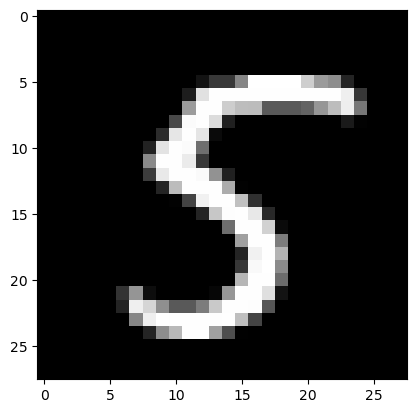

index: 57855
Lable: 1


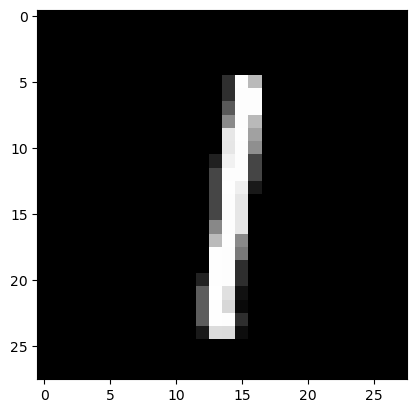

index: 21619
Lable: 4


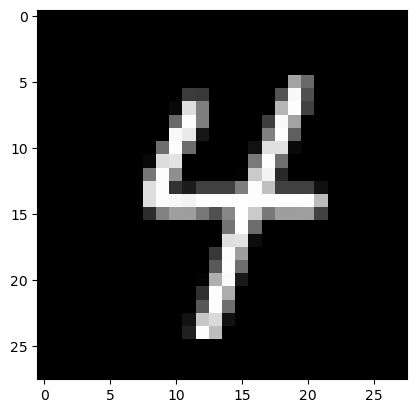

index: 38728
Lable: 7


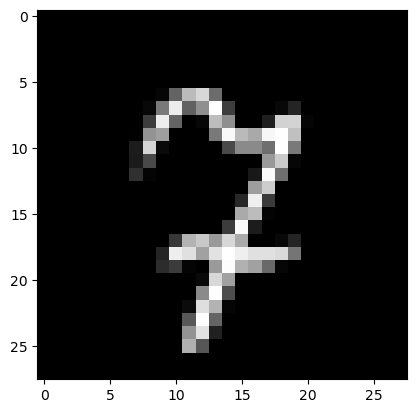

index: 42852
Lable: 1


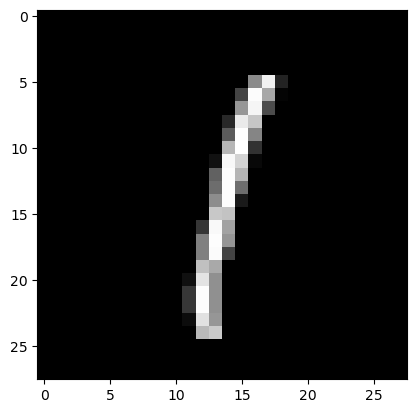

index: 30727
Lable: 6


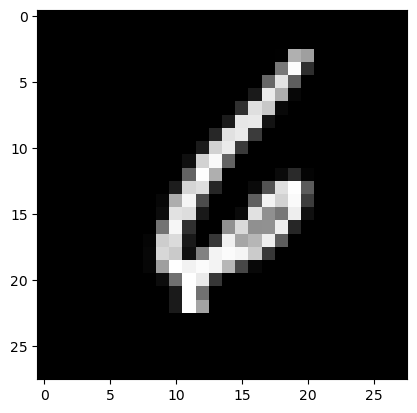

index: 26374
Lable: 7


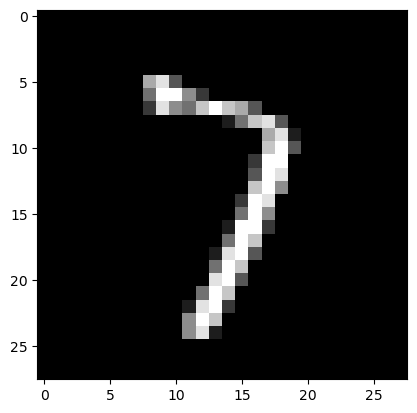

index: 547
Lable: 6


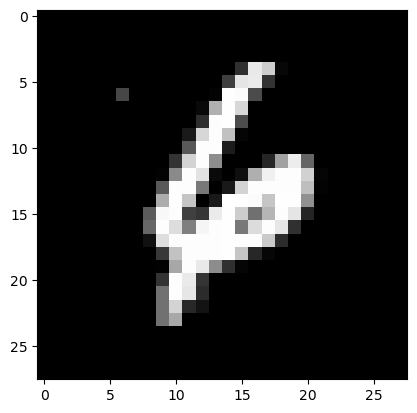

index: 24928
Lable: 7


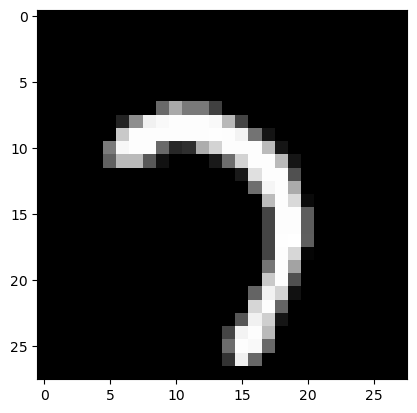

___________________




In [3]:
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")

Randomly printing 10 images with labels from testing dataset
index: 30487
Lable: 2


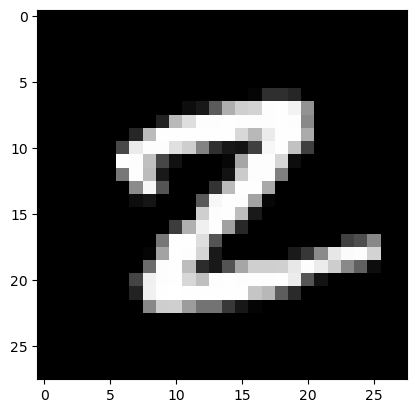

index: 7046
Lable: 3


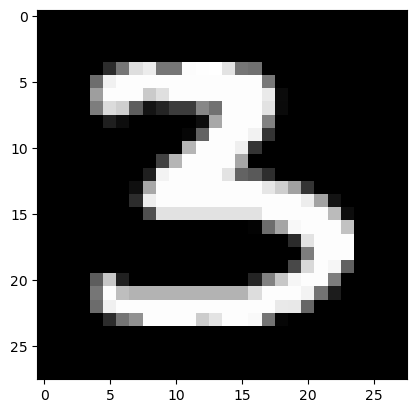

index: 24713
Lable: 4


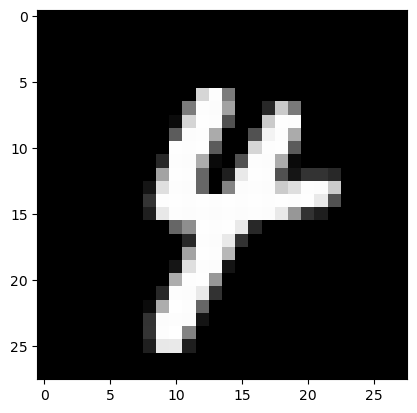

index: 29737
Lable: 9


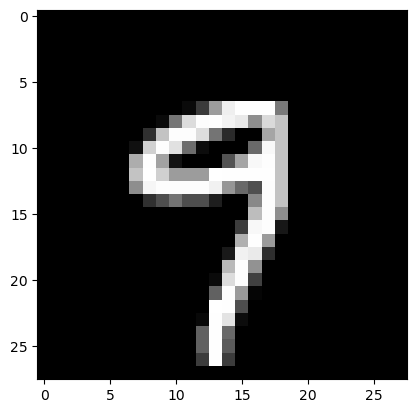

index: 39823
Lable: 0


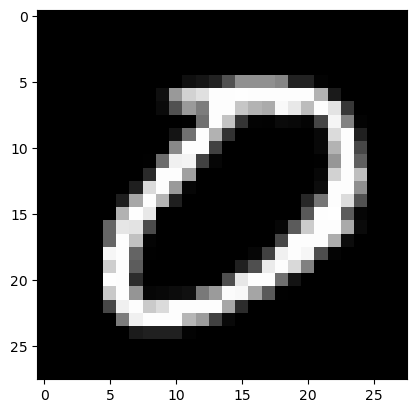

index: 15281
Lable: 3


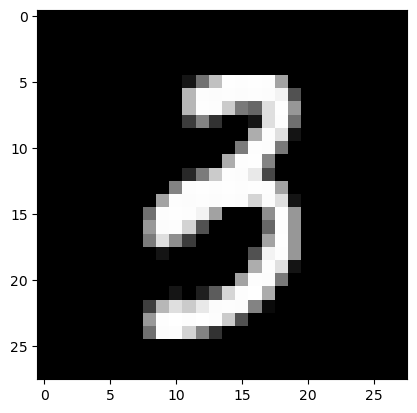

index: 12473
Lable: 8


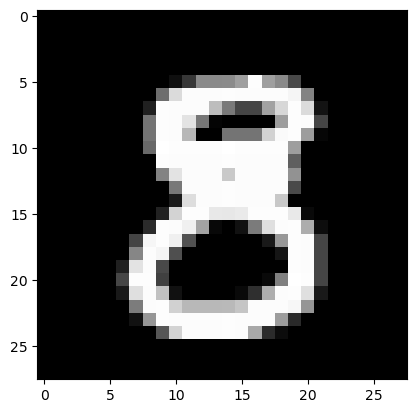

index: 33832
Lable: 2


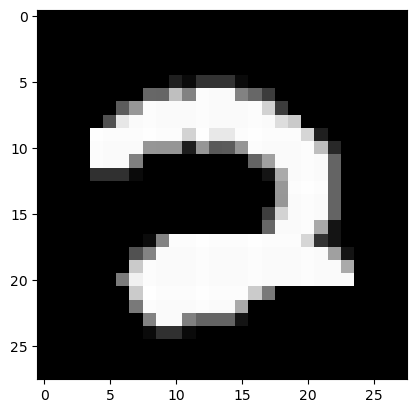

index: 50359
Lable: 7


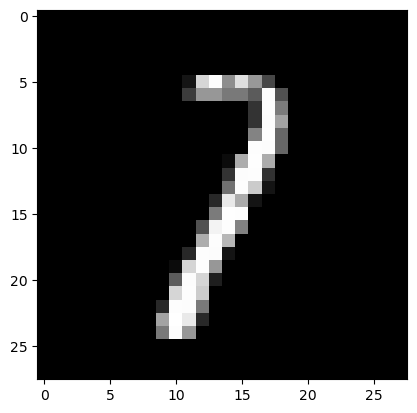

index: 28934
Lable: 6


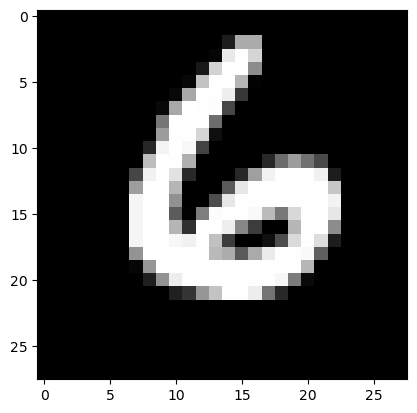

___________________




In [4]:
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")

In [5]:
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")


There are 60000 labels in training dataset for 60000 images in training dataset


In [6]:
print("There are",len(dataset[1][1]),"labels in testing dataset for",len(dataset[1][0]),"images in testing dataset")


There are 10000 labels in testing dataset for 10000 images in testing dataset


In [7]:
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))
print("___________________\n\n")

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

___________________




In [8]:
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")
print("___________________\n\n")

There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset
___________________




In [17]:
(train_data, train_labels), (test_data, test_labels) = dataset

label_images = {}
for i in range(len(train_data)):
    label = train_labels[i]
    if label not in label_images:
        label_images[label] = []
    label_images[label].append(i)
    
new_training_indices = []
for label, images in label_images.items():
    if len(images) > 600:
        images = random.sample(images, 600)
    new_training_indices.extend(images)
    
new_train_data = train_data[new_training_indices]
new_train_labels = train_labels[new_training_indices]

label_images = {}
for i in range(len(test_data)):
    label = test_labels[i]
    if label not in label_images:
        label_images[label] = []
    label_images[label].append(i)
    
new_test_indices = []
for label, images in label_images.items():
    if len(images) > 100:
        images = random.sample(images, 100)
    new_test_indices.extend(images)
    
new_test_data = test_data[new_test_indices]
new_test_labels = test_labels[new_test_indices]

new_dataset = ((new_train_data, new_train_labels), (new_test_data, new_test_labels))

print("There are", len(set(new_train_labels)), "unique classes in the reduced training dataset.")
print("Breakdown of each label is below (format: dict key is label, dict value is occurrence of that label/number of images for that label)")
print(dict(sorted(collections.Counter(new_train_labels).items())))

print("There are", len(set(new_test_labels)), "unique classes in the reduced test dataset.")
print("Breakdown of each label is below (format: dict key is label, dict value is occurrence of that label/number of images for that label)")
print(dict(sorted(collections.Counter(new_test_labels).items())))


There are 10 unique classes in the reduced training dataset.
Breakdown of each label is below (format: dict key is label, dict value is occurrence of that label/number of images for that label)
{0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 600, 8: 600, 9: 600}
There are 10 unique classes in the reduced test dataset.
Breakdown of each label is below (format: dict key is label, dict value is occurrence of that label/number of images for that label)
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


In [16]:
print(new_dataset[0][0][0].shape)
print("___________________")

(28, 28)
___________________


In [11]:
# Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Excepted output
# There are 6000 labels in training dataset for 6000 images in training dataset
# There are 1000 labels in training dataset for 1000 images in training dataset

There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________




In [12]:
# Checking the number of images per class
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))
print("___________________\n\n")



There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 600,
         0: 600,
         4: 600,
         1: 600,
         9: 600,
         2: 600,
         3: 600,
         6: 600,
         7: 600,
         8: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 100,
         2: 100,
         1: 100,
         0: 100,
         4: 100,
         9: 100,
         5: 100,
         6: 100,
         3: 100,
         8: 100})

___________________




Randomly printing 10 images with labels from training dataset
index: 3271
Lable: 2


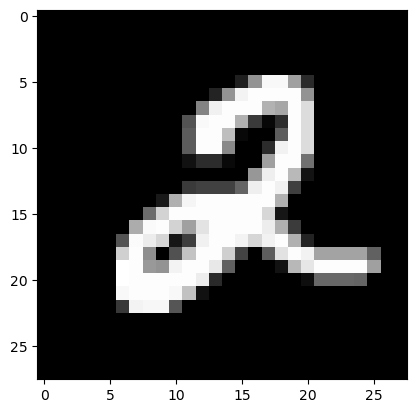

index: 3898
Lable: 3


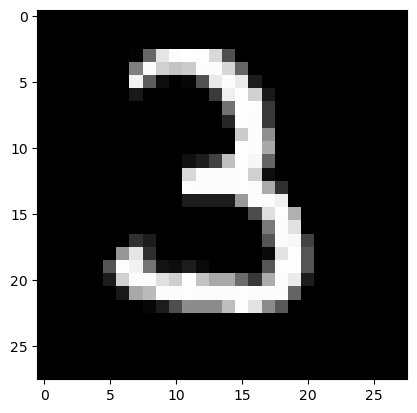

index: 2320
Lable: 1


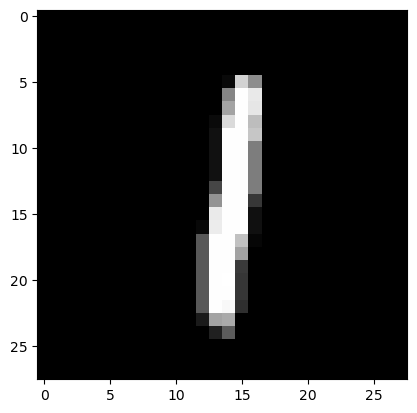

index: 3755
Lable: 3


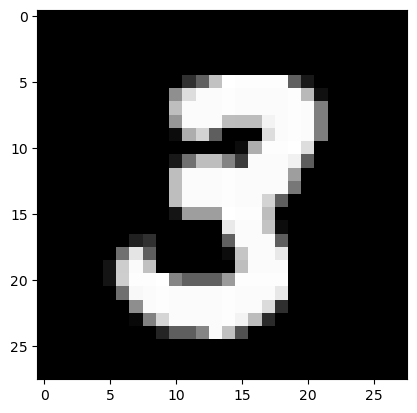

index: 420
Lable: 5


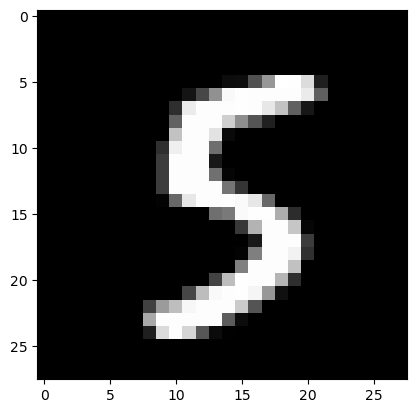

index: 1967
Lable: 1


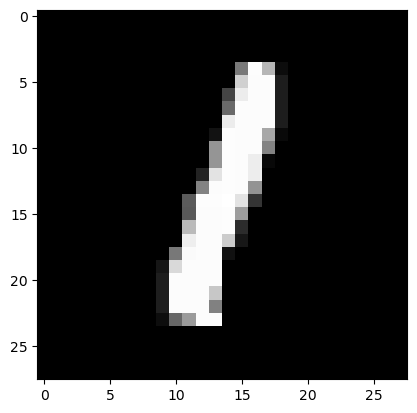

index: 2725
Lable: 9


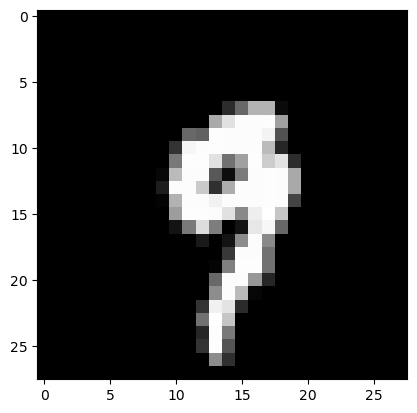

index: 3869
Lable: 3


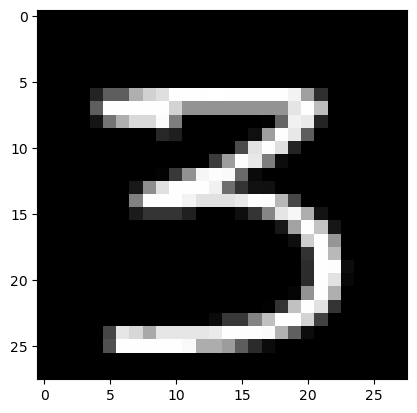

index: 977
Lable: 0


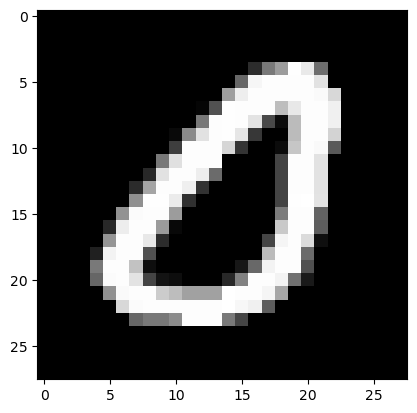

index: 2795
Lable: 9


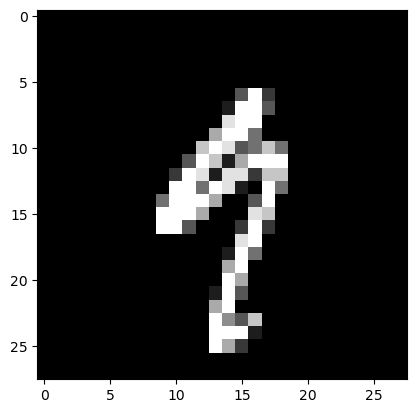

___________________




In [13]:
# Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")


Randomly printing 10 images with labels from testing dataset
index: 3058
Lable: 2


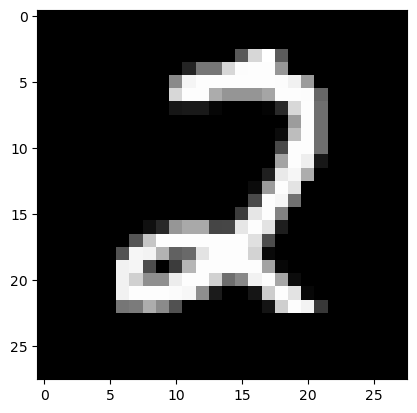

index: 5074
Lable: 7


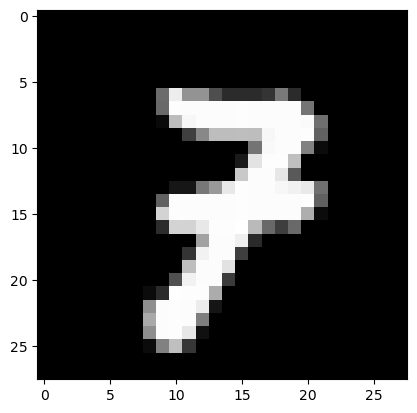

index: 2930
Lable: 9


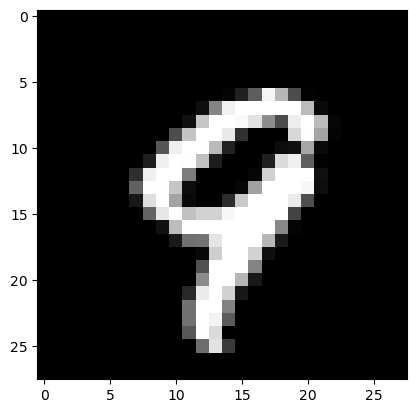

index: 1763
Lable: 4


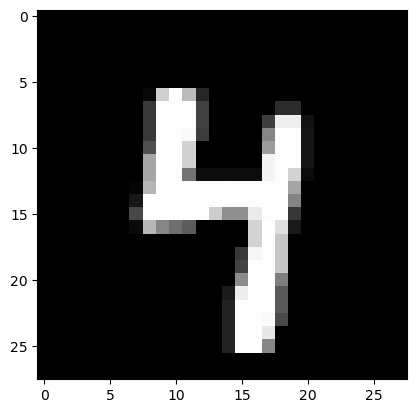

index: 5221
Lable: 7


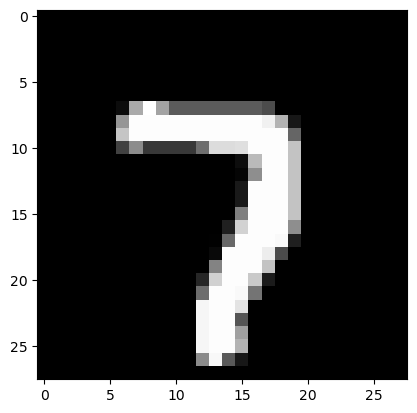

index: 718
Lable: 0


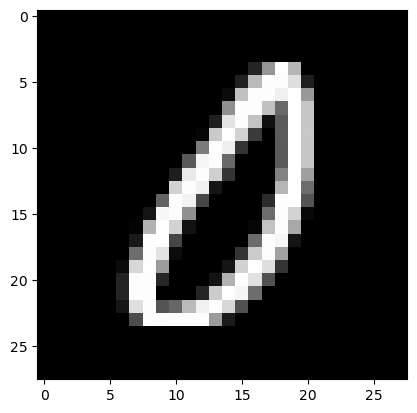

index: 4651
Lable: 6


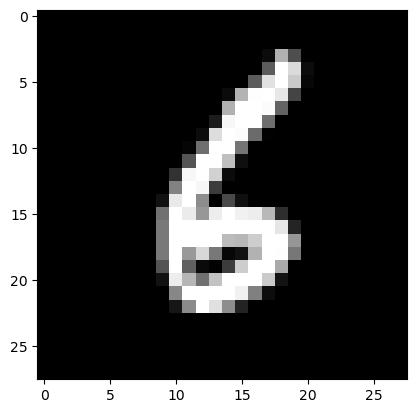

index: 3609
Lable: 3


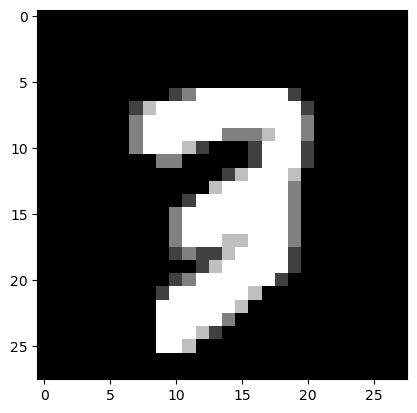

index: 2697
Lable: 9


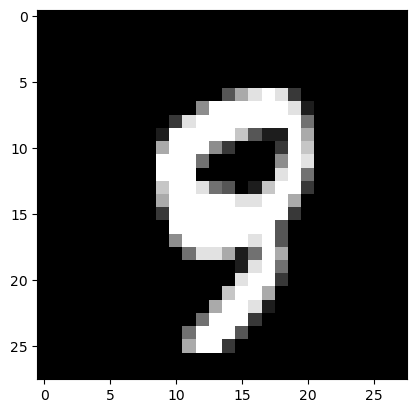

index: 3632
Lable: 3


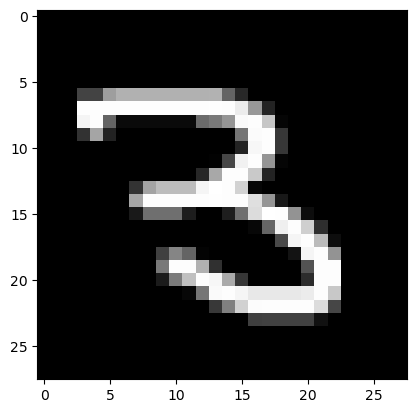

___________________




In [14]:
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")